# Problemset #4
### Kris Nichols

### 1A)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
import scipy.stats as sts
import numpy.linalg as LA

In [94]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)
rho = 0.85
mu = 11.4

In [81]:
z = np.zeros(500)
def simu(z_t, i):
    if i < 500:
        z_t1 = rho*z_t + (1-rho)*mu + eps_vec[i]
        z[i] = z_t1
        return simu(z[i], i+1)
    else:
        return z
    
z = simu(unif_vec[0],0)

def z_t_plus_1(z_t, rho, mu, epsilon):
    z_t1 = rho * z_t + (1 - rho) * mu + epsilon
    return z_t1

z_current = mu
z_t1_vector = np.zeros(T) 

for z_t1_index in range(T):
    z_t1 = z_t_plus_1(z_t=z_current, rho=rho, mu=mu, epsilon=eps_vec[z_t1_index])
    z_t1_vector[z_t1_index] = z_t1
    z_current = z_t1

In [95]:
z

array([  3.23849021,   4.60812198,   5.2164978 ,   5.51887776,
         6.24374493,   6.18543692,   7.30476859,   7.80913311,
         8.44675432,   8.65202383,   8.89116037,   8.42012593,
         8.77389048,   9.31889733,   8.94063031,   9.34590613,
         9.33842967,  10.01310826,   9.98214958,  10.88059339,
        10.92575602,  11.02585647,  10.8737385 ,  12.92131757,
        12.71811919,  12.62439986,  11.16738531,  11.61012107,
        11.43907413,  11.32209193,  10.92932058,  11.89810392,
        12.13057829,  11.94375158,  11.47441936,  11.50859111,
        11.59663594,  12.02894585,  12.59795921,  13.06894091,
        11.8213986 ,  12.01822875,  11.57692535,  11.59296933,
        12.77429957,  13.4019536 ,  12.72535125,  12.54826745,
        11.43187522,  11.68122987,  10.85853018,  11.44887645,
        10.44241322,  10.28012835,  10.77520778,  10.88509369,
        11.24180585,  11.44672244,  11.84573871,  11.62898043,
        11.4110171 ,  12.06395449,  12.35695971,  11.30

<function matplotlib.pyplot.show>

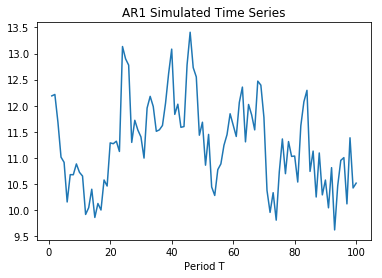

In [111]:
#Specify number of periods plotted
periods = 100
z_t1_vector_100 = z_t1_vector[0:periods]


plt.plot(np.arange(1, periods + 1), z_t1_vector_100, '-')
plt.title('AR1 Simulated Time Series')
plt.xlabel('Period T')
plt.show

### 1B

In [96]:
# In this cell I create an evenly spaced vector
lowerbound = mu-3*sigma
# Set Upper bound
upperbound = mu+3*sigma
# Used specified lower and upperbound objects in length between them
z_vals = np.linspace(lowerbound,upperbound,5)

z_vals

array([  9.3 ,  10.35,  11.4 ,  12.45,  13.5 ])

### 1C

In [84]:
# Specify values beteen the bounds set up in part b
z_1c = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_1c

array([  9.825,  10.875,  11.925,  12.975])

In [97]:
# Sort them into these bins 
def  sort_into_bin (z_value, z_1c):
    if z_value <= z_1c[0]:
        return 1
    elif (z_1c[0] < z_value) and (z_value <= z_1c[1]):
        return 2
    elif (z_1c[1] < z_value) and (z_value <= z_1c[2]):
        return 3
    elif (z_1c[2] < z_value) and (z_value <= z_1c[3]):
        return 4
    elif (z_value > z_1c[3]):
        return 5
    
    
# Empty Vector
transition_counts = np.zeros(shape=(5, 5), dtype=np.int16)

# Count occourences in these bins
start_bin_counts = np.zeros(5, dtype=np.int16)
prev_bin_num = None

for i in range(T):
    z_value = z_t1_vector[i]
    
    curr_bin_num = sort_into_bin(z_value=z_value, z_1c=z_1c)
    curr_bin_ind = curr_bin_num - 1
    
    if prev_bin_num:
        prev_bin_ind = prev_bin_num - 1
        transition_counts[prev_bin_ind][curr_bin_ind] += 1
    
    start_bin_counts[curr_bin_ind] += 1
        
    prev_bin_num = curr_bin_num
    
    
P_hat = np.zeros(shape=(5, 5), dtype=np.float32)

# State Probabilities for eacah outcome
i = 0
j = 0
for i in range(5):
    for j in range(5):
        denom = start_bin_counts[i]
        numer = transition_counts[i][j]
        P_hat[i][j] = numer / denom
        
P_hat

array([[ 0.68000001,  0.25999999,  0.04      ,  0.        ,  0.        ],
       [ 0.09166667,  0.55000001,  0.32499999,  0.03333334,  0.        ],
       [ 0.03067485,  0.2208589 ,  0.48466256,  0.22699386,  0.03680982],
       [ 0.        ,  0.04201681,  0.34453782,  0.50420171,  0.1092437 ],
       [ 0.        ,  0.        ,  0.04166667,  0.35416666,  0.60416669]], dtype=float32)

### 1D

In [99]:
# Start the vector in bin 3, as specified
x_1d = np.array([0, 0, 1, 0, 0])

probs_given_bin3 = np.dot(LA.matrix_power(P_hat.T, 3), x_1d)



bin5_given_bin3 = probs_given_bin3[5-1]
print("Probability of bin 5 given bin 3 = ", bin5_given_bin3)

Probability of bin 5 given bin 3 =  0.0802157819271


### 1E

In [107]:
# Fill with p_hat and round 
eigenvalues, eigenvector_matrix = LA.eig(P_hat.T)
eigenvalues = np.around(eigenvalues, decimals=2)

print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvector_matrix)

Eigenvalues:
[ 1.          0.75999999  0.12        0.56999999  0.37      ]
Eigenvectors:
[[ 0.20667441  0.54696763 -0.01777174 -0.49488944 -0.17947128]
 [ 0.49376178  0.49935713  0.3721658   0.37225124  0.68712676]
 [ 0.66687065 -0.0664635  -0.78980196  0.63412464 -0.23814754]
 [ 0.48014385 -0.53996009  0.48468661 -0.07822005 -0.5854097 ]
 [ 0.19552593 -0.39432797 -0.04968433 -0.45637819  0.31020656]]


In [108]:
one_ind = np.argwhere(eig_vals == 1).flatten()
eigenvector = eigenvector_matrix[:, one_ind] / eigenvector_matrix[:, one_ind].sum()
stat_dist = eigenvector
print(stat_dist)

The long-run Ergodic distribution of z_t:
[[ 0.10116337]
 [ 0.24168743]
 [ 0.32642108]
 [ 0.23502171]
 [ 0.0957064 ]]


### 1F

In [89]:
z_initial = 2
z_0 = z_vals[z_initial]
z_vec = np.zeros(T)
z_t = z_0

In [104]:
for i in range(T):
    index = np.argwhere(unif_vec[i] <= np.cumsum(p_hat_matrix[z_initial, :])).min()
    z_plus_1 = z_vals[index]
    z_vec[i] = z_plus_1
    
    z_t = z_plus_1
    z_initial = index

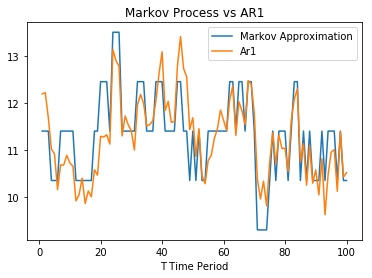

In [109]:
#Specify period T
periods = 100

z_t1_vector_100 = z_t1_vector[0:periods]
z_vector_trunc = z_vec[0:periods]
plt.plot(np.arange(1, periods + 1), z_vector_trunc, '-')
plt.plot(np.arange(1, periods + 1), z_t1_vector_100, '-')
plt.title('Markov vs AR1')
plt.legend(['Markov', 'Ar1'])
plt.xlabel('T Time Period')
plt.show()